In [31]:
import statsmodels.api as sm
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from scipy.stats import logistic

MC_N = 50
MC_θ = np.zeros((MC_N,4))
MC_y = np.zeros((MC_N,4))
MC_t = np.zeros((MC_N,4))

for j in range(MC_N):
    import numpy as np
    N = 5000
    σ_t = 1
    σ_y = 1
    σ_x = 1
    θ = 0.5 # TRUE ATE
    α_t = 0.5
    α_y = 0.5
    x = np.random.normal(0,σ_x,N)
    e_t = np.random.normal(0,σ_t,N)
    e_y = np.random.normal(0,σ_y,N)
    t = np.random.binomial(1,logistic.cdf(np.exp(α_t*x)))
    y = np.exp(α_y * x)*np.where(x>0,1,0)+np.exp(-α_y * x)*np.where(x<=0,1,0) + θ * t + e_y
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    t = t.reshape(-1, 1)
    data = np.c_[y,t,x]
    print(data[0:5])
    
    # OLS - Full Estimation
    model_OLS = sm.OLS(y, np.c_[t,x])
    res = model_OLS.fit()
    θ_OLS = res.params[0]
    # OLS First Stage: Y
    model_OLS = sm.OLS(y, np.c_[x])
    res_y = model_OLS.fit()
    θ_OLS_y = res_y.params[0]    
    # Logistic First Stage
    clf = LogisticRegression(random_state=0).fit(x, t)
    
    # DML Lasso
    model_Lasso = LinearDML(discrete_treatment=True, random_state=1)
    model_Lasso.fit(y, t, X=None,W=x)
    θ_DMLL = model_Lasso.intercept_

    # DML RF
    model_XGB = LinearDML(discrete_treatment=True, 
                          model_y = CatBoostRegressor(learning_rate=0.01, verbose = False), 
                          model_t = CatBoostClassifier(learning_rate=0.01, verbose = False))
    model_XGB.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_XGB.intercept_
    
    # DML NN - First Stage
    model_NN = LinearDML(discrete_treatment=True, 
                         model_y = MLPRegressor(hidden_layer_sizes=(100,20)), 
                         model_t = MLPClassifier(hidden_layer_sizes=(100,20)))
    model_NN.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_NN.intercept_


    MC_θ[j] = [θ_OLS, model_Lasso.intercept_, model_XGB.intercept_, model_NN.intercept_]
    MC_y[j] = [res_y.rsquared, np.mean(model_Lasso.nuisance_scores_y), np.mean(model_XGB.nuisance_scores_y),np.mean(model_NN.nuisance_scores_y)]
    MC_t[j] = [clf.score(x,t), np.mean(model_Lasso.nuisance_scores_t), np.mean(model_XGB.nuisance_scores_t),np.mean(model_NN.nuisance_scores_t)]
    
    

[[ 1.3350233   1.         -0.31039239]
 [ 2.01914427  1.         -0.07658046]
 [ 1.23317922  0.          0.7735825 ]
 [ 2.09711519  1.         -0.72175969]
 [ 1.53820646  0.         -1.23052169]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.293216    1.          1.93920745]
 [ 4.71024258  1.         -2.83746959]
 [ 2.62211073  1.          0.03072896]
 [ 2.29982838  1.         -0.28462427]
 [ 2.87105136  1.          1.65037975]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 3.72904086  1.         -1.23190008]
 [ 1.02750777  1.         -0.80100759]
 [ 2.49966744  1.         -0.28961215]
 [ 1.86120033  1.         -1.22427791]
 [ 3.20502714  1.         -1.53792477]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.43975143  1.          1.52073425]
 [ 3.02788877  1.         -0.0844169 ]
 [ 2.01482107  1.          0.60892084]
 [ 2.06819544  1.          0.31338432]
 [ 1.95047551  1.          1.02705774]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.59924015  1.         -0.07707244]
 [ 1.73841657  1.         -0.0717572 ]
 [ 2.6005368   1.          0.71833562]
 [ 2.25290934  1.         -0.19027376]
 [ 1.90162475  1.         -0.28680498]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.78242282  1.         -1.02611971]
 [ 3.94761799  1.         -1.27977919]
 [ 1.97461034  1.          0.00665174]
 [ 4.27292331  1.          0.8203229 ]
 [ 3.04011386  0.         -2.64389737]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.66950517  0.          0.80211943]
 [ 1.26078945  0.          1.59099829]
 [ 1.24605972  1.          0.18608273]
 [ 0.66333614  1.          0.98409895]
 [ 2.73788239  1.         -0.54093377]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.96484479  1.          0.26357698]
 [ 1.27489492  0.          1.23124973]
 [ 3.54288072  1.          1.80526688]
 [ 2.18690746  1.          0.79482139]
 [ 2.58668384  1.         -0.75682555]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.82665884  1.         -0.90781613]
 [ 3.99579299  1.         -1.45333887]
 [ 1.54568517  0.         -0.79879022]
 [ 0.65066868  0.         -1.06132473]
 [ 2.96273452  1.          1.16929255]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.43396102  1.          0.07336588]
 [ 0.60365811  1.          0.07275608]
 [-0.05621902  1.         -0.30644208]
 [ 2.87557395  1.          1.59664462]
 [ 2.28063837  1.         -0.18303613]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.91721469  1.         -1.08686035]
 [ 0.75015751  1.          0.80558461]
 [ 1.45374426  1.          0.16711326]
 [ 0.15311451  0.         -0.04031358]
 [ 2.89934498  1.          0.16871536]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.01975507  0.         -0.51353708]
 [-0.40911209  0.          0.72061081]
 [ 2.96860925  1.          0.76311328]
 [ 2.72010523  0.         -1.12488743]
 [ 2.42029185  1.          1.27356482]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.44554749  0.         -0.97670633]
 [ 3.17563418  1.          0.74260106]
 [ 3.72811822  0.         -0.25081209]
 [ 3.02508254  1.          1.39393087]
 [ 2.18836088  0.         -1.12450496]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.12499538  1.          0.07633011]
 [ 2.60880158  1.         -0.44486392]
 [ 1.85164545  1.         -0.40618819]
 [ 4.23034961  0.         -1.41215083]
 [ 4.52597904  1.          2.68354919]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.52672875  1.         -1.61860947]
 [ 2.56312911  1.          0.2480724 ]
 [ 0.39904826  1.         -0.20707107]
 [ 3.8995906   1.          1.46853362]
 [ 1.96436095  1.         -0.53682862]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.11130375  1.         -0.11998693]
 [ 2.51859935  0.         -1.3600317 ]
 [ 3.19553973  1.         -0.94531563]
 [ 1.76466058  1.         -0.95216469]
 [ 2.52885357  1.          2.06502063]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.23883106  0.          0.23945234]
 [ 3.32519346  1.          0.24695773]
 [ 0.41949419  0.          0.10503119]
 [ 2.10745363  1.         -0.57019792]
 [ 1.50942718  1.         -0.32287141]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[0.8260284  1.         0.02539673]
 [2.10044357 1.         0.8244    ]
 [3.37241299 0.         0.34943885]
 [3.17656215 1.         1.18104369]
 [2.4149301  1.         0.84442393]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.7621962   1.          1.81021833]
 [ 0.44237633  0.          0.21462922]
 [ 2.21694266  1.         -1.32998422]
 [ 2.07105203  1.         -1.55623028]
 [ 0.98414071  1.          0.53033485]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.58108513  1.          0.31314655]
 [ 0.16395094  1.         -1.06507954]
 [ 1.04385677  1.         -0.39825331]
 [ 4.23163509  1.          1.98304927]
 [ 3.21683164  1.          1.7846199 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.16201546  1.          1.26652387]
 [ 1.85604263  1.          0.51562215]
 [ 2.12159528  0.          0.55517097]
 [-0.68804219  1.         -0.04682295]
 [ 1.07024449  1.         -0.07050858]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.26178388  1.         -0.7514818 ]
 [ 2.71875473  1.         -1.27074136]
 [ 4.93804168  1.          2.92331329]
 [ 3.45953902  1.          1.02041655]
 [ 3.58641283  1.         -0.52263666]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.83635649  0.         -0.6891006 ]
 [ 2.31999092  1.          0.13316201]
 [ 1.67551352  1.          2.07230523]
 [ 2.66503486  1.         -0.70273636]
 [ 2.92941878  1.         -0.8539453 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.16493503  1.         -0.43794361]
 [ 0.74541358  1.          1.16865914]
 [ 1.27810213  0.         -0.06613168]
 [ 2.41249998  1.          0.27840648]
 [ 3.75208922  1.          1.72161399]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.28076152  1.          1.52414708]
 [ 0.16808143  0.         -0.44911474]
 [ 0.10817318  1.          0.59587746]
 [ 1.83444098  1.          1.30122836]
 [ 4.01647427  0.         -1.84812789]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.99139272  1.         -1.02613444]
 [ 1.23057747  0.          0.63991236]
 [ 4.91193598  1.          1.05016272]
 [-0.00518382  1.          0.62466277]
 [ 0.67051624  0.          1.11707204]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.69143114  1.          0.32285036]
 [ 1.04977167  1.          1.23712124]
 [ 1.43688438  0.         -1.44644372]
 [ 1.29393786  1.         -0.13960893]
 [ 0.3585106   0.         -1.30918017]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.86519592  1.          0.90966636]
 [ 1.98163085  1.          0.66373547]
 [ 0.34353203  1.          0.04137678]
 [ 1.91346881  0.         -1.15802901]
 [ 0.52344337  1.         -1.3750071 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.98844849  1.          0.42873037]
 [ 2.75071781  1.          0.91750264]
 [ 1.24804402  1.         -0.2559027 ]
 [-0.86495884  0.         -0.4230801 ]
 [ 3.82283631  1.          2.02012289]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.22464     1.         -0.75399933]
 [ 0.54004745  1.          0.32527206]
 [ 1.33452728  1.          0.28334231]
 [ 2.42138894  0.         -0.09894236]
 [ 4.43717606  1.          1.80016837]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.38398822  1.         -1.25997222]
 [ 1.22121855  1.         -0.72999611]
 [ 0.21038072  1.          0.79830742]
 [ 3.06230623  1.          0.02824266]
 [ 1.30366965  1.         -1.14280656]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 3.56240792  1.          1.5903304 ]
 [ 2.43478301  1.         -1.17002169]
 [ 2.51148107  0.         -0.62488805]
 [ 1.48594823  1.          0.42788254]
 [ 0.45337481  1.          0.21073162]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.03103423  1.         -0.10968506]
 [ 1.68326484  0.         -0.63699185]
 [ 2.48850431  0.         -1.33026968]
 [ 1.15871386  0.          1.1241439 ]
 [ 2.41169131  1.          1.54474434]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.6271566   1.         -0.76806962]
 [-0.07418629  1.          0.15125004]
 [ 0.6721398   1.         -0.13549802]
 [ 1.84443249  1.          0.61484759]
 [ 2.35341936  0.          1.88827386]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.63332642  1.          0.76320328]
 [ 0.54111637  1.          1.27856265]
 [ 2.83623331  1.          0.70290032]
 [ 3.21303482  1.         -1.77545066]
 [ 3.20392276  1.          0.79970655]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.66857332  1.          0.82145156]
 [ 1.48812719  0.         -0.04589753]
 [ 2.04903844  1.         -0.0585372 ]
 [ 2.0514637   1.          0.07126719]
 [ 1.95035744  1.          0.66540235]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.25187484  0.         -0.76062078]
 [ 2.59865207  1.          1.65666092]
 [ 3.16835959  1.          1.88585275]
 [ 3.09856836  1.         -0.21147443]
 [ 0.36004191  0.          0.52545638]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.51476384  1.         -0.16686016]
 [ 3.43202283  0.         -1.91425521]
 [ 4.01639625  1.         -0.64522965]
 [ 2.57548913  0.         -0.77983913]
 [ 2.15523144  1.         -0.73450894]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.22608528  1.         -0.65107089]
 [ 2.61216023  1.          1.43465279]
 [ 1.71447959  1.          0.48862783]
 [ 2.57793545  1.          1.57627195]
 [ 0.52653954  1.          0.04441314]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.83670636  1.         -1.10028563]
 [ 2.0213938   0.         -0.99581791]
 [ 3.51711233  1.         -0.16865162]
 [ 1.58546475  1.         -0.63214685]
 [-0.52696703  0.         -0.30468185]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.36946584  1.          0.79433685]
 [ 1.10316952  0.          0.74505727]
 [ 0.96515831  1.         -1.39692056]
 [ 3.04332702  1.          1.95880598]
 [ 2.32092289  1.          0.40359996]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.44392395  0.         -0.08520883]
 [ 2.23216039  1.          0.47162622]
 [ 2.18978242  1.          1.15839736]
 [ 0.87619558  1.         -0.00354235]
 [ 2.34650882  1.          0.61797591]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.12522044  0.         -0.55827749]
 [ 2.0633018   1.          0.93740403]
 [ 0.68986822  1.          0.46940369]
 [ 3.8784006   1.          1.03573075]
 [ 2.28410172  0.         -0.80149202]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.04786162  1.          1.6654354 ]
 [ 1.93873838  1.          0.65383278]
 [-1.44925035  0.         -0.29394652]
 [ 1.4503065   1.          0.89479952]
 [ 1.30867715  1.         -0.35061588]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.56274694  1.          1.09859048]
 [-0.1287677   0.         -0.75438428]
 [ 0.52260143  1.         -0.45959168]
 [ 1.02803542  0.          1.44809745]
 [ 2.47721916  0.         -0.26644888]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.82285303  0.          0.86510301]
 [ 0.79393816  0.         -0.5337744 ]
 [ 2.08645676  1.          1.38770165]
 [ 2.46182413  0.          0.31432733]
 [ 0.78747894  1.          0.0058167 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.39718233  0.          0.04829393]
 [-0.5787568   1.         -0.41826412]
 [ 0.66353467  0.         -1.45155037]
 [ 2.68033758  0.          0.05830912]
 [ 1.4581385   1.          0.37736997]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.79274249  1.          0.12448454]
 [ 3.15602691  1.         -0.60146955]
 [ 1.44523453  1.         -0.17852924]
 [ 2.65147753  1.          0.48560201]
 [ 3.87510995  1.          1.32833434]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.43805069  1.         -0.36851988]
 [ 3.36994609  1.          0.47238273]
 [ 2.62302841  1.         -0.68941161]
 [ 0.977342    1.         -0.03470169]
 [ 3.7804321   1.         -2.76713132]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 3.11361377  1.         -0.09239495]
 [ 1.29483134  1.          0.22002072]
 [ 1.73176466  1.          0.47819026]
 [ 1.32934913  1.         -0.35294421]
 [ 2.15308459  1.          0.16405121]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


In [35]:
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
table = PrettyTable()
table.field_names = ['Var', 'OLS','DML-L','DML-Boost','DML-NN']
a = ['Mean θ_hat']+ np.mean(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['Stdev θ_hat']+ np.std(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['97.5 Quantile θ_hat']+ np.quantile(MC_θ,0.975, axis = 0).tolist()
table.add_row(a)
a = ['2.5 Quantile θ_hat']+ np.quantile(MC_θ,0.025, axis = 0).tolist()
table.add_row(a)
a = ['First Stage Y R2']+ np.mean(MC_y, axis = 0).tolist()
table.add_row(a)
a = ['First Stage D Accuracy']+ np.mean(MC_t, axis = 0).tolist()
table.add_row(a)
table.float_format = '0.3'
print(table)

+------------------------+-------+-------+-----------+--------+
|          Var           |  OLS  | DML-L | DML-Boost | DML-NN |
+------------------------+-------+-------+-----------+--------+
|       Mean θ_hat       | 2.092 | 0.541 |   0.506   | 0.509  |
|      Stdev θ_hat       | 0.021 | 0.046 |   0.039   | 0.037  |
|  97.5 Quantile θ_hat   | 2.131 | 0.619 |   0.575   | 0.573  |
|   2.5 Quantile θ_hat   | 2.057 | 0.452 |   0.440   | 0.449  |
|    First Stage Y R2    | 0.001 | 0.000 |   0.222   | 0.230  |
| First Stage D Accuracy | 0.740 | 0.741 |   0.740   | 0.741  |
+------------------------+-------+-------+-----------+--------+


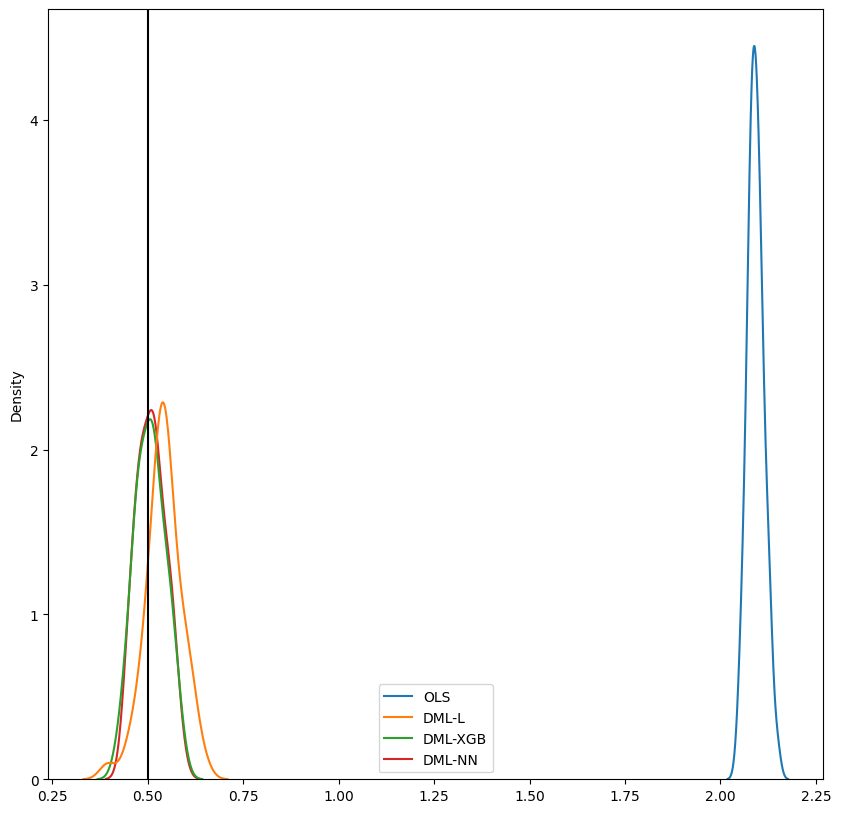

In [34]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.DataFrame(MC_θ,columns=['OLS','DML-L','DML-XGB','DML-NN'])
plt.figure(figsize=(10,10))
sns.kdeplot(df)
plt.axvline(0.5, color='black')
plt.savefig('ex4g.png')